In [9]:
%matplotlib inline

# import libraries
import glob
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution1D, Flatten
from keras.callbacks import EarlyStopping
from keras.layers.noise import GaussianNoise
from sklearn.decomposition import PCA
from keras.preprocessing import image
from scipy import misc
from keras.layers import Convolution2D, MaxPooling2D
from matplotlib import pyplot as plt

In [2]:
# read in images
images = glob.glob('images/*.jpg')
images = {int(x[7:-4]): misc.imread(x) for x in images}
images[1015].shape

(271, 654)

In [3]:
# read in data
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

Y_train = X_train['species']
X_train = X_train.drop('species', axis=1)

X_train['image'] = X_train['id'].map(lambda x: images[x])
X_test['image'] = X_test['id'].map(lambda x: images[x])

X_train = X_train.drop('id', axis=1)
X_test = X_test.drop('id', axis=1)

# one hot encode species
lb = preprocessing.LabelBinarizer()
lb.fit(Y_train)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [35]:
temp = X_train['image']
temp = temp.map(lambda x: misc.imresize(x,(240,240)))
temp[0].shape

(240, 240)

In [36]:
print(temp[0].shape)
print(temp.shape)
temp = temp.map(lambda x: x.reshape(1, x.shape[0], x.shape[1]))
print(temp[0].shape)
print(temp.shape)
temp = np.array(temp.tolist())
print(temp.shape)

(240, 240)
(990,)
(1, 240, 240)
(990,)
(990, 1, 240, 240)


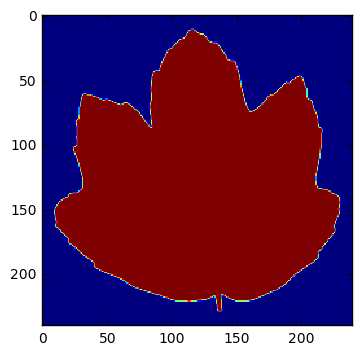

In [37]:
img = temp[0,0,:,:]
img = Image.fromarray(img)
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
model = Sequential([
    Convolution2D(32, 3, 3, input_shape=(1, 240, 240)),
    Activation('relu'),
    Convolution2D(32, 3, 3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128),
    Activation('relu'),
    Dropout(0.25),
    Dense(lb.classes_.size),
    Activation('softmax'),
])


model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    temp,
    lb.transform(Y_train), 
    validation_split=0.2,
    nb_epoch=10
)

Train on 792 samples, validate on 198 samples
Epoch 1/10
160/792 [=====>........................] - ETA: 113s - loss: 15.7324 - acc: 0.0187

In [9]:
predictions = model.predict_proba(X_test.as_matrix())

594/594 [==============================] - 0s     


In [10]:
labels = test['id']
headers = lb.classes_.tolist()
headers = ['id']+headers
results = pd.DataFrame(data=predictions)
labels = pd.DataFrame(labels)
results = pd.concat([labels, results], axis=1)
results.columns = headers
results.to_csv('results.csv', index=False)